<a href="https://colab.research.google.com/github/bitanb1999/DeepVision/blob/main/architechture_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 7.5 MB/s 


In [1]:
import tensorflow as tf
import keras

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.advanced_activations import ELU

In [2]:
import visualkeras

In [3]:
def model2():
    '''Insight: Going deeper than 5 layers here stops the learning '''
    # new model
    network = Sequential()
    #--- Convolutional Layers
    # Convolutional Layer
    network.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(96, 96, 7)))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    #--- Dense Layers
    # Dense Layer
    network.add(Dropout(.3))
    network.add(Flatten())
    network.add(Dense(512, activation='relu'))
    # Dense Layer
    network.add(Dropout(.4))
    network.add(Dense(128, activation='relu'))
    # Dense 3
    network.add(Dense(1, activation='sigmoid'))
    return(network)

In [4]:
model=model2()

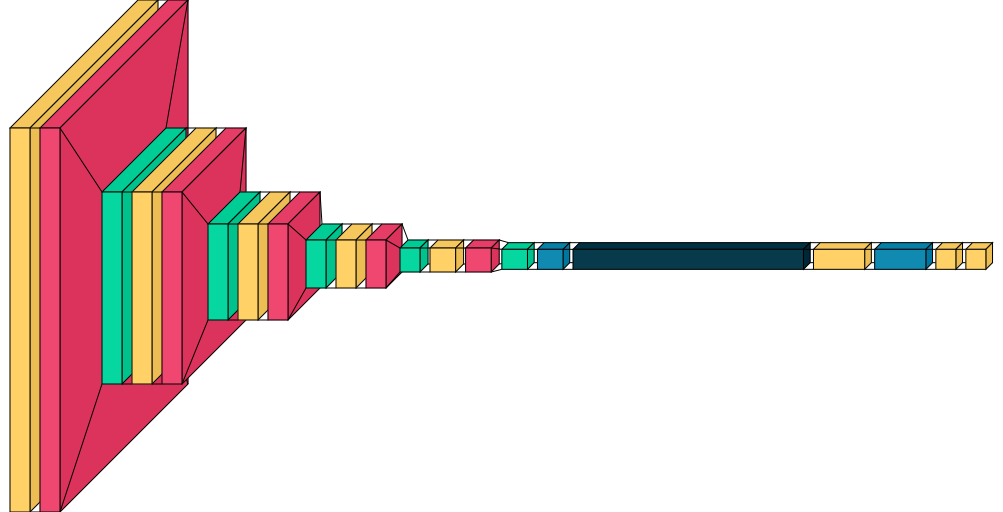

In [5]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [6]:
def model3():
    # new model
    network = Sequential()
    #--- Convolutional Layers
    # Convolutional Layer
    network.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(96, 96, 7)))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    # Convolutional Layer
    network.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    network.add(BatchNormalization())
    network.add(MaxPooling2D((2, 2)))
    #--- Dense Layers
    # Dense Layer
    network.add(Dropout(.3))
    network.add(Flatten())
    network.add(Dense(512, activation='relu'))
    # Dense Layer
    network.add(Dropout(.4))
    network.add(Dense(128, activation='relu'))
    # Dense Layer
    network.add(Dense(1, activation='sigmoid'))
    return(network)
model=model3()

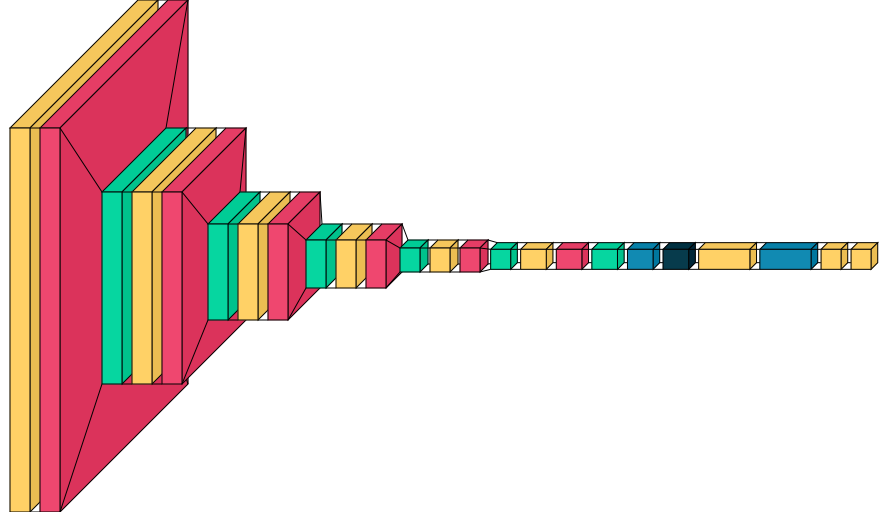

In [7]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [8]:
def model_inception_V3(img_height = 96, img_width = 96, n_channel = 3, n_rlu = 1024, dropout_prop = .5, activation = 'elu'):
    # initialize the trained inception V3 model
    base_model = InceptionV3(
        weights = 'imagenet', include_top = False, 
        input_shape = (img_height, img_width, n_channel))
    # add a global spatial average pooling layer
    last_layer = base_model.output
    last_layer = GlobalAveragePooling2D()(last_layer)
    # normalize the batch
    BatchNormalization()
    # add a fully-connected layer
    last_layer = Dense(n_rlu, activation = activation)(last_layer)
    # add a dropout layer
    last_layer = Dropout(dropout_prop)(last_layer)
    # get the predictions through the sigmoid layer
    out = Dense(1, activation = 'sigmoid', name = 'output_layer')(last_layer)
    # put it together into one model
    network = Model(inputs = base_model.input, outputs = out)
    # freeze all but the final two fc. 3 here, because there is the dropout in between
    max_layers = len(network.layers)
    for layer in network.layers[:(max_layers - 3)]:
        layer.trainable = False
    for layer in network.layers[(max_layers - 3):]:
        layer.trainable = True
    # return the model
    return(network)

In [9]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = model_inception_V3()
# summarize the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_11 (BatchN  (None, 47, 47, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['batch_normalization_11[0][0

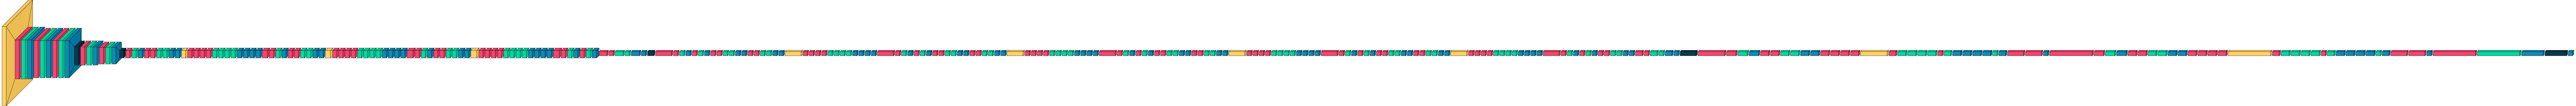

In [10]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [22]:
!pip install quiver

  Created wheel for quiver: filename=quiver-0.1-py3-none-any.whl size=3828 sha256=3bd158b1c7c5229e78c4b7d244a496cfe9f534ac7ba116f7bebdf47f259795ab
  Stored in directory: /root/.cache/pip/wheels/60/8c/6b/4ab52d86dc12a9279051f2d75cc7af1e9bf1eef908e5227d12
Successfully built quiver


In [11]:
model=model3()